News Mood
In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.
The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.
The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.
As final considerations:

Use the Matplotlib and Seaborn libraries.
Include a written description of three observable trends based on the data.
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
Include an exported markdown version of your Notebook called  README.md in your GitHub repository.

    HW7 Pseudocode: Step by Step (just one approach among many,  you can always be creative):
    (1) Import dependencies
    (2) Initialize Sentiment Analyzer 
    (3) Setup Tweep API Authentication
    (4) Select News Sources
    (5) Probably two for-loop: outer-loop to loop through all news sources, inner-loop to grab 100 tweets for each source (run sentiment analysis here)
    Note: before the outer-loop, you might also consider creating a generic dictionary with different empty lists for holding all tweet information
    (6) Store the final contents into a DataFrame
    (7) Export to CSV
    (8) Convert dates (currently strings) into datetimes, hint: pd.to_datetime()
    (9) Sort the dataframe by date, you can preview the data to confirm data is sorted
    (10) Build scatter plot for tracking tweet polarity by tweet history
    (11) Build Bar plot of overall sentiments for each news source. You might want to first Average all polarities by news source.
    Note: Please make sure you Save PNG images for each plot
    Note: Don't forget a written description of three observable trends based on the data.


- NYT has more responses which can show a higher number of audience
- CBS's result shows more news based on audiences liking; might deliver biased news
- Interaction with the other news sources are closer to neutral, which shows mainstream news.

In [17]:
#Import dependencies:
import tweepy 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
#Initialize Sentiment Analyzer:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [4]:
# Select News Sources:
news_sources = ("@BBC","@CBS","@CNN","@Fox","@New York times")


In [5]:
n_items = 100

In [6]:
#Probably two for-loop: outer-loop to loop through all news sources, inner-loop to grab 100 tweets for each source (run sentiment analysis here)
counter = 0 
results_list =[]
n_items = 100
    
for channel in news_sources:
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    for x in tweepy.Cursor(api.search, q=channel, results_type = "recent").items(n_items):
        
        
        if counter % 100 == 0:
            
            print(f"we got to {channel} successfully!")
        
        counter += 1
        
        tweet = x._json
        
        
        results = analyzer.polarity_scores(tweet["text"])
        
        compound_list.append(results['compound'])
        positive_list.append(results['pos'])
        negative_list.append(results['neg'])
        neutral_list.append(results['neu'])
        
    sentiment_dict = {"Date": tweet["created_at"],
                      "News_Source": channel,
                      "Compound": np.mean(compound_list),
                      "Positive": np.mean(positive_list),
                      "Negative": np.mean(negative_list),
                      "Neutral": np.mean(neutral_list),
                      "Tweets Ago":counter
                      }

    results_list.append(sentiment_dict)
print(results_list)
        

we got to @BBC successfully!
we got to @CBS successfully!
we got to @CNN successfully!
we got to @Fox successfully!
we got to @New York times successfully!
[{'Date': 'Tue Apr 10 16:50:39 +0000 2018', 'News_Source': '@BBC', 'Compound': 0.033628, 'Positive': 0.08126, 'Negative': 0.07342, 'Neutral': 0.8454100000000001, 'Tweets Ago': 100}, {'Date': 'Tue Apr 10 16:50:46 +0000 2018', 'News_Source': '@CBS', 'Compound': 0.11082600000000001, 'Positive': 0.05869, 'Negative': 0.021079999999999998, 'Neutral': 0.9202400000000001, 'Tweets Ago': 200}, {'Date': 'Tue Apr 10 17:06:35 +0000 2018', 'News_Source': '@CNN', 'Compound': 0.004161000000000019, 'Positive': 0.07885999999999999, 'Negative': 0.06591, 'Neutral': 0.8552199999999999, 'Tweets Ago': 300}, {'Date': 'Tue Apr 10 10:38:59 +0000 2018', 'News_Source': '@Fox', 'Compound': -0.014541000000000012, 'Positive': 0.06297000000000001, 'Negative': 0.06572, 'Neutral': 0.8713299999999999, 'Tweets Ago': 400}, {'Date': 'Sun Apr 08 21:09:39 +0000 2018', 'Ne

In [7]:
#Store the final contents into a DataFrame:
sentiment_df = pd.DataFrame(results_list)
sentiment_df

,Compound,Date,Negative,Neutral,News_Source,Positive,Tweets Ago
0,0.033628,Tue Apr 10 16:50:39 +0000 2018,0.073420,0.84541,@BBC,0.081260,100
1,0.110826,Tue Apr 10 16:50:46 +0000 2018,0.021080,0.92024,@CBS,0.058690,200
2,0.004161,Tue Apr 10 17:06:35 +0000 2018,0.065910,0.85522,@CNN,0.078860,300
3,-0.014541,Tue Apr 10 10:38:59 +0000 2018,0.065720,0.87133,@Fox,0.062970,400
4,-0.400500,Sun Apr 08 21:09:39 +0000 2018,0.378667,0.55200,@New York times,0.069333,403


In [8]:
#Export to CSV:
output_fn = "News_Sentiment_Analysis.csv"
sentiment_df.to_csv(output_fn)

In [9]:
#Convert dates (currently strings) into datetimes, hint: pd.to_datetime():
# converted_time = []
# for time in tweet["created_at"]:
#     converted_time.append(pd.to_datetime(time, "%a %b %d %H:%M:%S %z %Y"))
# print(converted_time)

sentiment_df["Date"] = pd.to_datetime(sentiment_df["Date"])
sentiment_df["Date"]

0   2018-04-10 16:50:39
1   2018-04-10 16:50:46
2   2018-04-10 17:06:35
3   2018-04-10 10:38:59
4   2018-04-08 21:09:39
Name: Date, dtype: datetime64[ns]

In [10]:
sentiment_df = sentiment_df.sort_values(["Date"])
sentiment_df

,Compound,Date,Negative,Neutral,News_Source,Positive,Tweets Ago
4,-0.400500,2018-04-08 21:09:39,0.378667,0.55200,@New York times,0.069333,403
3,-0.014541,2018-04-10 10:38:59,0.065720,0.87133,@Fox,0.062970,400
0,0.033628,2018-04-10 16:50:39,0.073420,0.84541,@BBC,0.081260,100
1,0.110826,2018-04-10 16:50:46,0.021080,0.92024,@CBS,0.058690,200
2,0.004161,2018-04-10 17:06:35,0.065910,0.85522,@CNN,0.078860,300


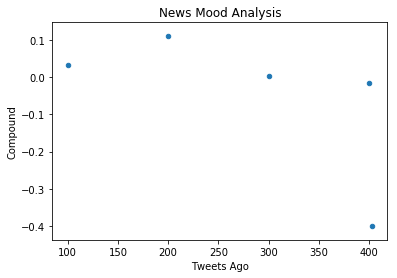

In [14]:
sentiment_df.plot(x="Tweets Ago", y='Compound',title='News Mood Analysis', kind='scatter')
plt.show()

In [15]:
plt.savefig('News Mood Analysis.png')

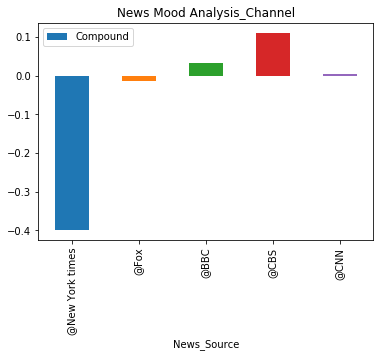

In [13]:
sentiment_df.plot(x="News_Source", y="Compound", title = "News Mood Analysis_Channel", kind = "bar")
plt.show()

In [16]:
plt.savefig('News Mood Analysis_Channel.png')